In [52]:
#Questions
# Dataset is imbalanced
# How to adjust the timeframes for churn and metrics before churn - based on order frequency distribution
# How to reduce dimensions - find the most correlated features 
# How to measure the effectiveness of model - AB test, productionize 
# Optimize model and test different types of models

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Standard libraries for data analysis:    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [4]:
dataset = pd.read_csv('/Users/pleng/pml_customer.csv')


In [5]:
dataset.head()

,id_customer,signup_date,country,loyalty_member,email_subscription,push_subscription,omnichannl,brand,last_nps,last_order_date,first_order_date,days_since_signup,days_since_1st_purchase,gross_orders,avg_monthly_pv,avg_monthly_atc,lifetime_net_revenue,lifetime_net_aov,lifetime_net_units,avg_du,lifetime_return_rate,Churn
0,6.0,19/9/2013,Thailand,No,Yes,Yes,Online Only,3rd Product only,Promotor,8/12/2015,29/7/2015,3234.0,2556.0,3.0,NaN,NaN,174.083919,58.027973,6.0,0.000000,0.272727,Yes
1,7.0,19/9/2013,Thailand,No,Yes,No,Online Only,has not purchase,NaN,6/3/2015,18/12/2013,3234.0,3144.0,10.0,NaN,NaN,796.049597,79.604960,20.0,0.000000,0.310345,Yes
2,8.0,20/9/2013,Thailand,Yes,Yes,Yes,Online Only,Purchase both brand type,NaN,9/11/2021,27/2/2019,3233.0,1247.0,7.0,24.4,1.2,277.042608,4.397502,171.0,0.404027,0.240000,Yes
3,10.0,20/9/2013,Thailand,No,Yes,No,Online Only,has not purchase,NaN,28/3/2014,30/11/2013,3233.0,3162.0,3.0,NaN,NaN,80.063784,26.687928,2.0,0.000000,0.500000,Yes
4,11.0,21/9/2013,Thailand,No,No,No,Online Only,has not purchase,NaN,17/10/2013,25/9/2013,3232.0,3228.0,3.0,NaN,NaN,578.820238,192.940079,13.0,0.000000,0.071429,Yes


In [6]:
dataset.describe()

,id_customer,days_since_signup,days_since_1st_purchase,gross_orders,avg_monthly_pv,avg_monthly_atc,lifetime_net_revenue,lifetime_net_aov,lifetime_net_units,avg_du,lifetime_return_rate
count,7.101440e+05,710144.000000,710144.000000,710144.000000,555551.000000,555551.000000,710144.000000,710143.000000,710144.000000,7.101070e+05,710143.000000
mean,1.492453e+06,1253.095009,1093.660465,3.947402,24.845171,1.777346,126.087001,18.645444,24.161683,2.768294e-01,0.219657
std,1.024232e+06,1079.958454,642.610122,9.347019,44.688291,3.862647,495.768868,24.605654,121.931443,2.288963e-01,0.342343
min,6.000000e+00,60.000000,60.000000,1.000000,0.000000,0.000000,-371.057838,-209.271207,-18.000000,-6.580000e-09,0.000000
25%,5.877202e+05,727.000000,623.000000,1.000000,5.000000,0.000000,17.835550,5.104974,2.000000,1.000000e-01,0.000000
50%,1.364192e+06,1170.000000,991.000000,2.000000,12.200000,0.600000,41.107447,11.528252,4.000000,2.304249e-01,0.000000
75%,2.221486e+06,1689.000000,1514.000000,3.000000,27.500000,2.000000,102.743788,23.944057,15.000000,4.173406e-01,0.391304
max,4.049504e+06,701839.000000,3228.000000,1033.000000,4026.000000,412.000000,189586.625500,1934.358862,66983.000000,1.500000e+01,2.000000


In [7]:
dataset.dtypes

id_customer                float64
signup_date                 object
country                     object
loyalty_member              object
email_subscription          object
push_subscription           object
omnichannl                  object
brand                       object
last_nps                    object
last_order_date             object
first_order_date            object
days_since_signup          float64
days_since_1st_purchase    float64
gross_orders               float64
avg_monthly_pv             float64
avg_monthly_atc            float64
lifetime_net_revenue       float64
lifetime_net_aov           float64
lifetime_net_units         float64
avg_du                     float64
lifetime_return_rate       float64
Churn                       object
dtype: object

In [8]:
dataset = dataset.dropna(subset=['id_customer'])

In [9]:
dataset.isna()

,id_customer,signup_date,country,loyalty_member,email_subscription,push_subscription,omnichannl,brand,last_nps,last_order_date,first_order_date,days_since_signup,days_since_1st_purchase,gross_orders,avg_monthly_pv,avg_monthly_atc,lifetime_net_revenue,lifetime_net_aov,lifetime_net_units,avg_du,lifetime_return_rate,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710139,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
710140,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
710141,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
710142,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False


In [10]:
values = {"last_nps":"None","avg_monthly_pv":0,"avg_monthly_atc":0}
dataset = dataset.fillna(value=values)

In [11]:
dataset.isna()

,id_customer,signup_date,country,loyalty_member,email_subscription,push_subscription,omnichannl,brand,last_nps,last_order_date,first_order_date,days_since_signup,days_since_1st_purchase,gross_orders,avg_monthly_pv,avg_monthly_atc,lifetime_net_revenue,lifetime_net_aov,lifetime_net_units,avg_du,lifetime_return_rate,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
710140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
710141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
710142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
dataset["Churn"].value_counts()

Yes    641520
No      68624
Name: Churn, dtype: int64

In [13]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))


4 columns were label encoded.


In [14]:
dataset.columns


Index(['id_customer', 'signup_date', 'country', 'loyalty_member',
       'email_subscription', 'push_subscription', 'omnichannl', 'brand',
       'last_nps', 'last_order_date', 'first_order_date', 'days_since_signup',
       'days_since_1st_purchase', 'gross_orders', 'avg_monthly_pv',
       'avg_monthly_atc', 'lifetime_net_revenue', 'lifetime_net_aov',
       'lifetime_net_units', 'avg_du', 'lifetime_return_rate', 'Churn'],
      dtype='object')

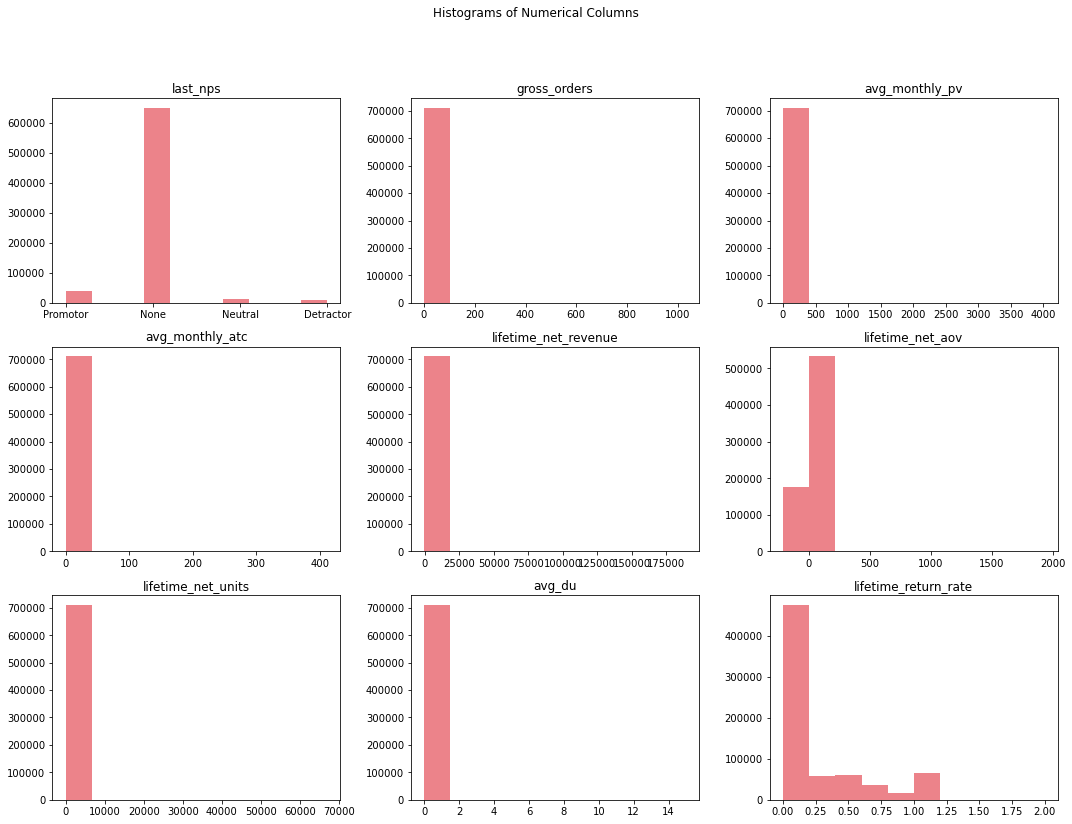

In [15]:
dataset2 = dataset[['last_nps', 'gross_orders', 'avg_monthly_pv',
       'avg_monthly_atc', 'lifetime_net_revenue', 'lifetime_net_aov',
       'lifetime_net_units', 'avg_du', 'lifetime_return_rate']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 12, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(3, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])   
    plt.hist(dataset2.iloc[:, i], color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


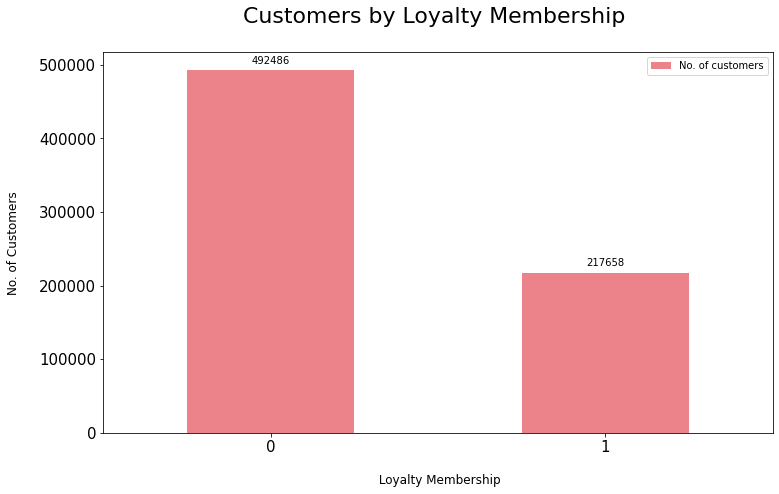

In [16]:
loyalty_split = dataset[[ "id_customer", "loyalty_member"]]
lyt = loyalty_split .groupby("loyalty_member")
loyalty_split = pd.DataFrame(lyt["id_customer"].count())
loyalty_split.rename(columns={'id_customer':'No. of customers'}, inplace=True)

ax =  loyalty_split[["No. of customers"]].plot.bar(title = 'Customers by Loyalty Membership',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Loyalty Membership',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Customers by Loyalty Membership \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='upper right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")

plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(loyalty_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)  
        
add_value_labels(ax)


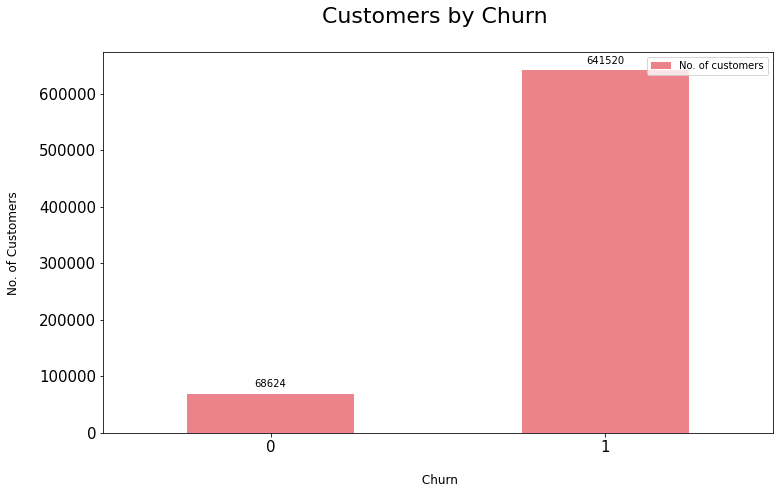

In [17]:
churn_split = dataset[[ "id_customer", "Churn"]]
churn = churn_split .groupby("Churn")
churn_split = pd.DataFrame(churn["id_customer"].count())
churn_split.rename(columns={'id_customer':'No. of customers'}, inplace=True)

ax =  churn_split[["No. of customers"]].plot.bar(title = 'Customers by Churn',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Churn',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Customers by Churn \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='upper right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")

plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(churn_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)  
        
add_value_labels(ax)


<ipython-input-18-73d241faee61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["Churn"] = pd.Series(


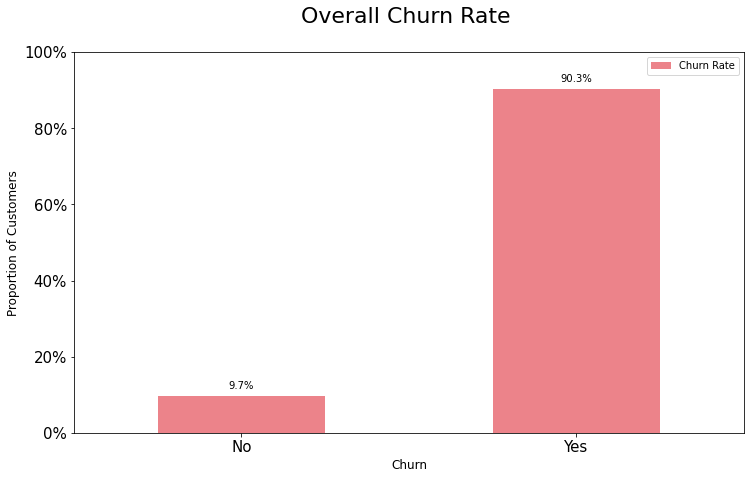

In [18]:
import matplotlib.ticker as mtick
churn_rate = dataset[["id_customer", "Churn"]]

churn_rate["Churn"] = pd.Series(
np.where((churn_rate["Churn"] == 0), "No", "Yes"))

sectors = churn_rate .groupby ("Churn")

churn_rate = pd.DataFrame(sectors["id_customer"].count())

churn_rate["Churn Rate"] = (
churn_rate ["id_customer"]/ sum(churn_rate ["id_customer"]) )*100

ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, 
ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

x_labels = np.array(churn_rate[["id_customer"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    

        ax.annotate(label,
                (x_value, y_value),         
                 xytext=(0, space),
                 textcoords="offset points", 
                 ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

In [19]:
loyalty_churn = dataset.groupby(['loyalty_member','Churn']).size().unstack()
print(loyalty_churn)

Churn               0       1
loyalty_member               
0               10900  481586
1               57724  159934


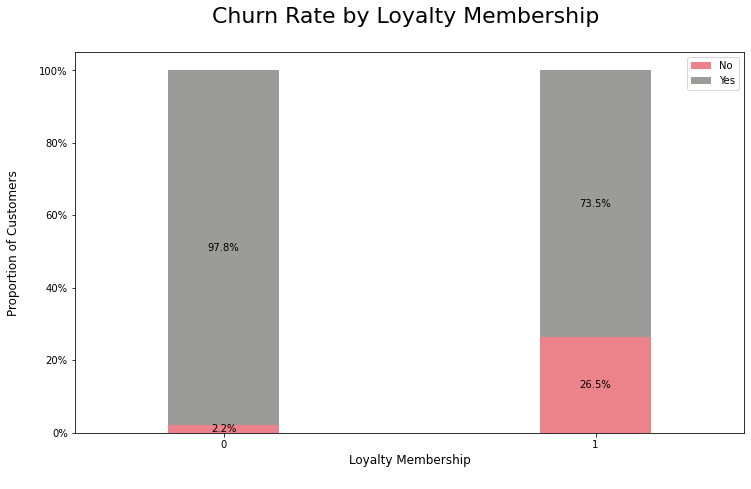

In [20]:
loyalty_churn = dataset.groupby(['loyalty_member','Churn']).size().unstack()

loyalty_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (loyalty_churn.T*100.0 / loyalty_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Loyalty Membership\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Loyalty Membership \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [21]:
dataset2 = dataset[['country', 'loyalty_member',
       'email_subscription', 'push_subscription', 'omnichannl', 'brand',
       'last_nps', 'days_since_signup',
       'days_since_1st_purchase', 'gross_orders', 'avg_monthly_pv',
       'avg_monthly_atc', 'lifetime_net_revenue', 'lifetime_net_aov',
       'lifetime_net_units', 'avg_du', 'lifetime_return_rate']]
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 days_since_1st_purchase    0.163920
days_since_signup          0.066791
lifetime_net_aov           0.021492
push_subscription          0.006218
dtype: float64

Most Negative Correlations: 
 avg_du                 -0.016046
email_subscription     -0.039571
lifetime_return_rate   -0.039592
avg_monthly_atc        -0.056784
avg_monthly_pv         -0.087054
lifetime_net_units     -0.173475
lifetime_net_revenue   -0.190003
gross_orders           -0.302349
loyalty_member         -0.379295
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

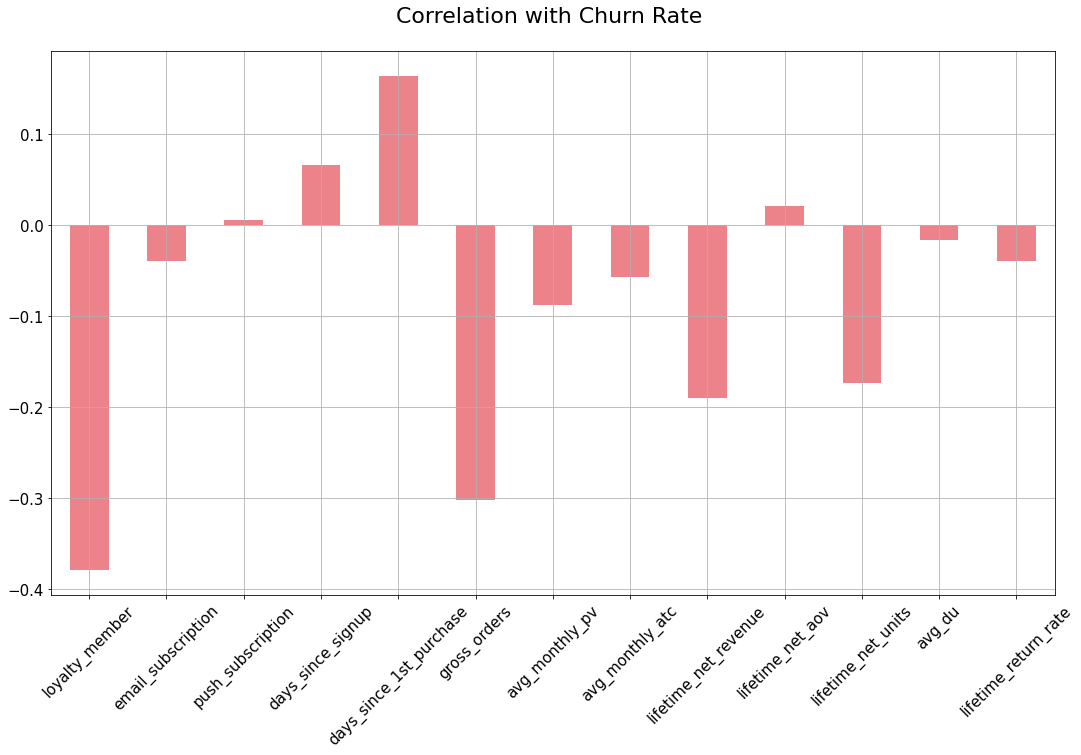

In [22]:
correlations = dataset2.corrwith(dataset.Churn)

correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
        
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710144 entries, 0 to 710143
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id_customer              710144 non-null  float64
 1   signup_date              710144 non-null  object 
 2   country                  710144 non-null  object 
 3   loyalty_member           710144 non-null  int64  
 4   email_subscription       710144 non-null  int64  
 5   push_subscription        710144 non-null  int64  
 6   omnichannl               710144 non-null  object 
 7   brand                    710144 non-null  object 
 8   last_nps                 710144 non-null  object 
 9   last_order_date          710144 non-null  object 
 10  first_order_date         710144 non-null  object 
 11  days_since_signup        710144 non-null  float64
 12  days_since_1st_purchase  710144 non-null  float64
 13  gross_orders             710144 non-null  float64
 14  avg_

In [24]:
#Fill null values
na_cols = dataset.isna().any()

na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()

for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(0)


In [53]:
#Incase if user_id is an object:
    
identity = dataset["id_customer"]
dataset = dataset.drop(columns=['id_customer','country','signup_date','last_order_date', 'first_order_date'])
#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)
#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

dataset.head()

KeyError: "['country' 'signup_date' 'last_order_date' 'first_order_date'] not found in axis"

In [26]:
#Identify response variable:
    
response = dataset["Churn"]
dataset = dataset.drop(columns="Churn")

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2, random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (568115, 25)
Number transactions y_train dataset:  (568115,)
Number transactions X_test dataset:  (142029, 25)
Number transactions y_test dataset:  (142029,)


In [28]:
train_identity = X_train['id_customer']
X_train = X_train.drop(columns = ['id_customer'])
test_identity = X_test['id_customer']
X_test = X_test.drop(columns = ['id_customer'])

In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142029 entries, 510132 to 342324
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   loyalty_member                          142029 non-null  int64  
 1   email_subscription                      142029 non-null  int64  
 2   push_subscription                       142029 non-null  int64  
 3   days_since_signup                       142029 non-null  float64
 4   days_since_1st_purchase                 142029 non-null  float64
 5   gross_orders                            142029 non-null  float64
 6   avg_monthly_pv                          142029 non-null  float64
 7   avg_monthly_atc                         142029 non-null  float64
 8   lifetime_net_revenue                    142029 non-null  float64
 9   lifetime_net_aov                        142029 non-null  float64
 10  lifetime_net_units                     

In [ ]:
#Scale features 
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [30]:
X_test.head()

,loyalty_member,email_subscription,push_subscription,days_since_signup,days_since_1st_purchase,gross_orders,avg_monthly_pv,avg_monthly_atc,lifetime_net_revenue,lifetime_net_aov,lifetime_net_units,avg_du,lifetime_return_rate,omnichannl_Omnichannel - Offline First,omnichannl_Omnichannel - Online First,omnichannl_Online Only,brand_3rd Product only,brand_Pomelo only,brand_Purchase both brand type,brand_has not purchase,last_nps_Detractor,last_nps_Neutral,last_nps_None,last_nps_Promotor
510132,1,1,1,782.0,148.0,2.0,0.6,0.0,14.310119,4.770040,3.0,0.000000,0.000000,1,0,0,1,0,0,0,0,0,1,0
291536,0,1,0,1342.0,1322.0,1.0,0.0,0.0,11.750688,11.750688,1.0,0.600000,0.000000,0,0,1,0,1,0,0,0,0,1,0
159839,0,1,0,1752.0,1744.0,1.0,0.0,0.0,42.760967,42.760967,2.0,0.000000,0.000000,0,0,1,0,1,0,0,0,0,1,0
52679,0,1,1,2381.0,1254.0,3.0,30.6,1.3,156.163045,17.351449,24.0,0.198313,0.000000,0,0,1,0,1,0,0,0,0,1,0
84725,1,1,1,2132.0,2126.0,2.0,4.6,0.3,127.657410,21.276235,18.0,0.109202,0.142857,0,0,1,0,0,1,0,1,0,0,0


In [35]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='sag', random_state = 0, 
                                                         class_weight='unbalanced')))
# models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
# models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
# models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
# models.append(('Gaussian NB', GaussianNB()))
# models.append(('Decision Tree Classifier',
#                DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
# models.append(('Random Forest', RandomForestClassifier(
#     n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=0)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
        model, X_train, y_train, cv=kfold, scoring='accuracy')
# roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/Users/pleng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/pleng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/pleng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/pleng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/pleng/opt/a

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,83.1,0.24,82.91,0.17


In [36]:
#--Step 15.4.1. Logistic Regression-----------------

# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

/Users/pleng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.916602   0.927564  0.984568  0.955216  0.972613


In [40]:
#Step 17:Predict Feature Importance------------------------------------------------------
 

# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'id_customer').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)


,features,coef
15,omnichannl_Online Only,0.635865
17,brand_Pomelo only,0.416277
22,last_nps_None,0.293370
2,push_subscription,0.271579
1,email_subscription,0.233117
7,avg_monthly_atc,0.207987
11,avg_du,0.117254
16,brand_3rd Product only,0.111487
12,lifetime_return_rate,0.103512
10,lifetime_net_units,0.002932


In [41]:
#Step 18.3:Final Hyper parameter tuning and selection --------------------------------------


lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)

# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1] 

/Users/pleng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,60,1837
1,1085,25544


In [47]:
# Step 20: Format Final Results:-------------------------------------------------------


final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

final_results["propensity_to_convert(%)"] = y_pred_probs 

final_results["propensity_to_convert(%)"] = final_results["propensity_to_convert(%)"]*100

final_results["propensity_to_convert(%)"]=final_results["propensity_to_convert(%)"].round(2)

final_results = final_results[['id_customer', 'Churn', 'predictions', 'propensity_to_convert(%)']]

final_results ['Ranking'] = pd.qcut(final_results['propensity_to_convert(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

final_results = pd.concat([final_results, X_test], axis = 1)

print(final_results)

        id_customer  Churn  predictions  propensity_to_convert(%) Ranking  \
510132    2105445.0      0            1                     65.47      10   
291536    1061143.0      1            1                     98.58       3   
159839     518848.0      1            1                     99.26       2   
52679      211111.0      1            1                     98.24       4   
84725      298274.0      1            1                     99.09       2   
...             ...    ...          ...                       ...     ...   
448092    1834144.0      1            1                     93.15       7   
131669     395079.0      1            1                     99.22       2   
669655    3346532.0      0            0                     43.91      10   
175311     577971.0      0            1                     70.75      10   
342324    1289647.0      1            1                     98.41       3   

        loyalty_member  email_subscription  push_subscription  \
510132    

In [51]:
os.makedirs('/Users/pleng/', exist_ok=True)  

final_results.to_csv(path_or_buf='/Users/pleng/churn_prediction.csv',index=False)